## Подготовка данных

На этом шаге происходит изучение данных в датасете: какие типы данных содержатся в датасете, количество записей, проверка на наличие дубликатов и на отсутствие данных.

#### 1. Загрузка библиотек 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene, f_oneway, kruskal
print('Setup complete!')

Setup complete!


#### 2. Загрузка данных

Чтение датасета и отображение первых 5 строк для первичного ознакомления с данными. 

In [3]:
data = pd.read_csv('data/online_learning_course_consumption_dataset.csv')
data.head()

,User_ID,Experience_Level,Course_Type,Platform,Hours_Spent_Per_Week,Course_Duration_Weeks,Completion_Status,Completion_Percentage,Dropout_Reason,Satisfaction_Score
0,U0001,Fresher,Tech,Skillshare,16,8,Completed,67,No Dropout,2
1,U0002,Fresher,Non-Tech,edX,17,22,Dropped,38,Time Constraint,3
2,U0003,Fresher,Non-Tech,Coursera,19,21,In Progress,43,No Dropout,1
3,U0004,Student,Non-Tech,Udemy,14,2,Dropped,14,Time Constraint,1
4,U0005,Student,Non-Tech,Skillshare,8,10,Dropped,8,Too Difficult,4


#### 3. Вывод общей информации о наборе данных

Вывод покажет, какие типы данных содержатся в каждом столбце, количество записей, столбцов и строк.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    object
 1   Experience_Level       500 non-null    object
 2   Course_Type            500 non-null    object
 3   Platform               500 non-null    object
 4   Hours_Spent_Per_Week   500 non-null    int64 
 5   Course_Duration_Weeks  500 non-null    int64 
 6   Completion_Status      500 non-null    object
 7   Completion_Percentage  500 non-null    int64 
 8   Dropout_Reason         500 non-null    object
 9   Satisfaction_Score     500 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 39.2+ KB


Датасет включает:
- 500 строк
- 10 столбцов
- 6 столбцов со смешанным типом данных (object)
- 4 столбца с целочисленным типом данных (int)

#### 4. Просмотр уникальных значений в каждом столбце 

В некоторых столбцах значения повторяются (к этому выводу я пришла, взглянув на первые 5 строк). Определение уникальных значений нужно, чтобы определить разнообразие данных.

In [8]:
data.apply(lambda x: x.unique())

User_ID                  [U0001, U0002, U0003, U0004, U0005, U0006, U00...
Experience_Level                  [Fresher, Student, Working Professional]
Course_Type                                               [Tech, Non-Tech]
Platform                       [Skillshare, edX, Coursera, Udemy, YouTube]
Hours_Spent_Per_Week     [16, 17, 19, 14, 8, 11, 12, 1, 5, 13, 6, 2, 20...
Course_Duration_Weeks    [8, 22, 21, 2, 10, 11, 19, 17, 14, 15, 20, 3, ...
Completion_Status                        [Completed, Dropped, In Progress]
Completion_Percentage    [67, 38, 43, 14, 8, 53, 34, 37, 51, 98, 71, 27...
Dropout_Reason           [No Dropout, Time Constraint, Too Difficult, L...
Satisfaction_Score                                         [2, 3, 1, 4, 5]
dtype: object

In [9]:
data.Dropout_Reason.unique()

array(['No Dropout', 'Time Constraint', 'Too Difficult', 'Lost Interest'],
      dtype=object)

В столбцах Experience_Level, Course_Type, Platform, Completion_Status, Dropout_Reason и Satisfaction_Score данных не так много и они представляют собой качественные и порядковые признаки. Эти данные можно использовать для группировки и сравнения, а также для проверки уровня лояльности пользователей. 

#### 5. Выявление неявных пропусков

Перед исследованием данных нужно проверить датасет на наличие незаполненных значений, чтобы избежать ошибок.

In [15]:
data.isnull().sum().sum().item()

0

Пропуски не обнаружны. 

#### 6. Проверка данных на наличие дубликатов

Данные могут дублировать друг друга, а наличие дубликатов может искажать результаты анализа.

In [19]:
data.duplicated().sum().item()

0

Дубликаты не обнаружены.

#### Вывод

На начальном этапе подготовки данных был проведен анализ набора данных, состоящего из 500 строк и 10 столбцов, включающего как объектные, так и целочисленные типы данных. Анализ подтвердил отсутствие пустых значений и повторяющихся записей в наборе данных, что позволило продолжить исследование и анализ данных без необходимости очистки или заполнения пропущенных значений.

## Исследовательский анализ данных

Целью этого этапа является проверка сформулированных гипотез. 

#### 1. Просмотр описательной статистики 

Выявление основных статистических показателей и распредления числовых признаков. 

In [5]:
data.describe()

,Hours_Spent_Per_Week,Course_Duration_Weeks,Completion_Percentage,Satisfaction_Score
count,500.000000,500.000000,500.000000,500.000000
mean,10.560000,13.256000,50.480000,3.022000
std,5.520085,6.506853,26.973259,1.434445
min,1.000000,2.000000,5.000000,1.000000
25%,6.000000,8.000000,30.750000,2.000000
50%,11.000000,13.500000,46.000000,3.000000
75%,15.000000,19.000000,73.000000,4.000000
max,20.000000,24.000000,100.000000,5.000000


Медиана и среднее значение во всех столбцах имеют незначительные отличия. Следовательно, наличие выбросов не подтверждается. 

<Axes: xlabel='Course_Duration_Weeks'>

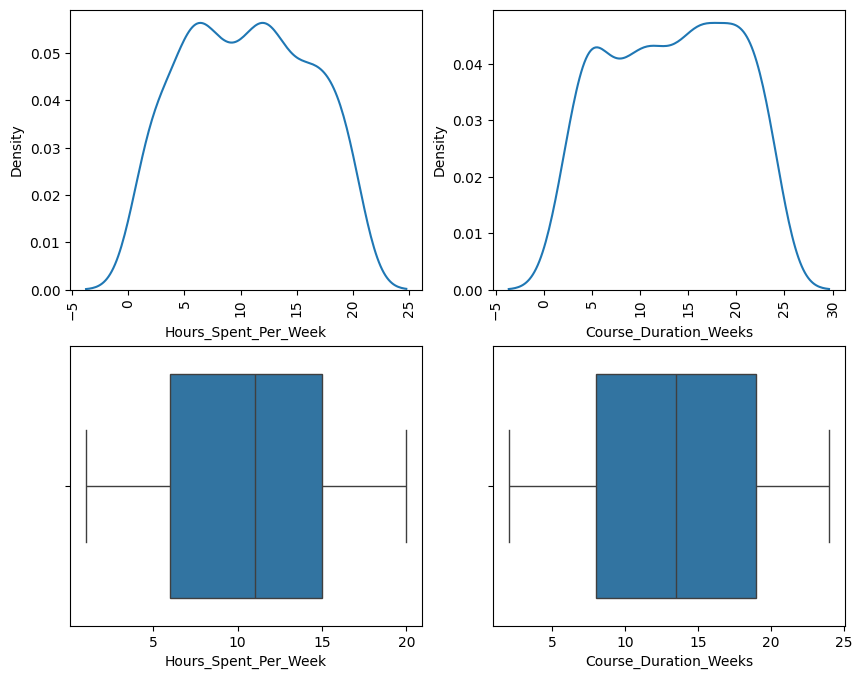

In [64]:
plt.figure(figsize=(10,8))

# Построение сетки из графиков.
plt.subplot(2, 2, 1)
# Визуализация распредления данных столбца Hours_Spent_Per_Week.  
sns.kdeplot(data=data, x='Hours_Spent_Per_Week')
plt.xticks(rotation=90) 

plt.subplot(2, 2, 2)
# Визуализация распредления данных столбца Course_Duration_Weeks.  
sns.kdeplot(data=data, x='Course_Duration_Weeks')
plt.xticks(rotation=90)  

plt.subplot(2, 2, 3)
# Построение диаграммы Boxplot для столбца Hours_Spent_Per_Week.
sns.boxplot(data=data, x='Hours_Spent_Per_Week')  

plt.subplot(2, 2, 4)
# Построение диаграммы Boxplot для столбца Course_Duration_Weeks.
sns.boxplot(data=data, x='Course_Duration_Weeks') 

Распределение значений у столбцов Hours_Spent_Per_Week и Course_Duration_Weeks близко к нормальному, значит данные этих столбцов можно использовать при проверке параметрических статистических тестов. 

Ниже на диаграмме Боксплот выбросы не были обнаружены, значит для последующего анализа можно использовать среднее значение. 

#### Гипотеза №1. Больше половины пользователей проходят курсы с техническим направлением.

Course_Type
Non-Tech    256
Tech        244
Name: count, dtype: int64

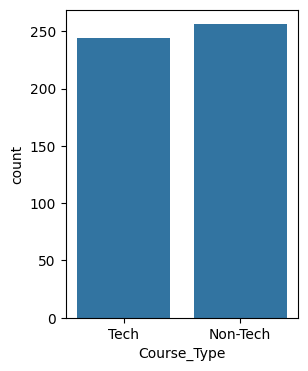

In [6]:
plt.figure(figsize=(3,4))
# Построение столбчатой диаграммы частот для столбца Course_Type. 
sns.countplot(data=data, x='Course_Type')

# Вывод количества значений для каждого вида курса.
data['Course_Type'].value_counts()

**Гипотеза №1 не подтвердилась.** Большая часть пользователей (256 респондентов из 500) проходит курсы нетехнических направлений. 

#### Гипотеза №2. Профессионалы чаще других категорий участников курса забрасывают прохождение курса.

Experience_Level      Completion_Status
Fresher               Dropped              0.362573
                      In Progress          0.356725
                      Completed            0.280702
Student               Completed            0.365385
                      Dropped              0.352564
                      In Progress          0.282051
Working Professional  In Progress          0.381503
                      Dropped              0.323699
                      Completed            0.294798
dtype: float64

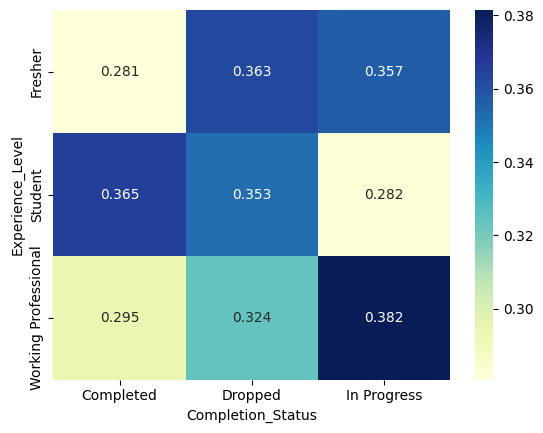

In [9]:
# Построение таблицы частот для двух категориальных переменных: Experience_Level и Completion_Status. 
# Преобразование численных значений в доли.
table = pd.crosstab(data['Experience_Level'], data['Completion_Status'], normalize='index')
# Добавление значений из таблицы частот на тепловую карту для визуального сравнения.
sns.heatmap(table, annot=True, fmt=".3f", cmap='YlGnBu')

# Вывод долей отдельно от тепловой карты.
data.groupby('Experience_Level').Completion_Status.value_counts() / data.groupby('Experience_Level').Completion_Status.count()

**Гипотеза №2 не подтвердилась.** От обучения отказываются чаще всего (в своей категории) первокурсники. Профессионалы среди всех категорий участников курса бросают курсы реже всего. 

#### Гипотеза №3. Чаще всего курсы забрасывают из-за отсутствия времени. 

Dropout_Reason
Time Constraint    47
Too Difficult      47
Lost Interest      35
Name: count, dtype: int64

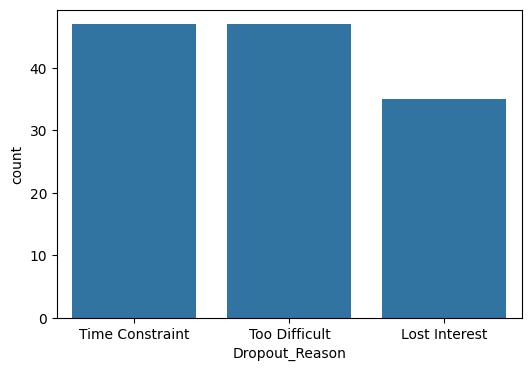

In [11]:
plt.figure(figsize=(6,4))
# Фильтрация данных: исключение причины 'No Dropout' из общего перечисления причин.
filtered_data = data[data['Dropout_Reason'] != 'No Dropout']
# Построение столбчатой диаграммы частот для столбца Dropout_Reason. 
sns.countplot(data=filtered_data, x='Dropout_Reason')

# Вывод количества значений для каждой причины кроме 'No Dropout'.
filtered_data.Dropout_Reason.value_counts()

**Гипотеза №3 не подтвердилась.** Нехватка времени на выполнение курса на том же уровне, что и сложность курса, поэтому здесь нельзя выделить одну причину. Основные причины для отказа от прохождения курса - ограничение по времени и высокая сложность курса для участников.  

#### Гипотеза №4. Слишком сложными курсы являются в основном для первокурсников.

In [15]:
# Фильтрация данных: курс заброшен и причина отказа от курса - 'Too Difficult'. 
# Группировка данных по столбцу Experience_Level.
data.loc[
    (data['Completion_Status'] == 'Dropped') & 
    (data['Dropout_Reason'] == 'Too Difficult')
].groupby('Experience_Level').Dropout_Reason.value_counts()

Experience_Level      Dropout_Reason
Fresher               Too Difficult     13
Student               Too Difficult     14
Working Professional  Too Difficult     20
Name: count, dtype: int64

**Гипотеза №4 не подтвердилась.** "Слишком сложными" курсы считают профессионалы с опытом работы. Первокурсники реже всех выбирают причину отказа "Высокий уровень сложности".

#### Гипотеза №5. Количество времени, которое пользователь тратит на курс в неделю, не влияет на завершение курса.

In [6]:
def test_hypothesis(p_value, alpha = 0.05):
    """
    Выводит заключение о статистической значимости на основе p-value.

    Args:
        p_value: Рассчитанный уровень значимости (вероятность ошибки).
        alpha: Критерий статистической значимости (по умолчанию 0.05).

    Returns:
        None: Функция выводит результат в консоль.
    """
    if p_value < alpha:
        print("Отвергаем H0: средние различаются")
    else:
        print("Не отвергаем H0: статистически значимой разницы нет") 

In [11]:
# Разделение данных на две группы для выполнения t-теста. 
# Статус выполнения курса: Завершен.
group1 = data[data['Completion_Status'] == 'Completed']['Hours_Spent_Per_Week']
# Статус выполнения курса: Заброшен.
group2 = data[data['Completion_Status'] == 'Dropped']['Hours_Spent_Per_Week']

# Расчет t-критерия Стьюдента и p-значения.
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Вывод заключения. 
test_hypothesis(p_value)

t-statistic: 1.0492952793324934
p-value: 0.2948257845932791
Не отвергаем H0: статистически значимой разницы нет


**Гипотеза №5 подтвердилась.** Статистически значимой разницы между количеством времени (в неделю), которое пользователь тратит на курс и статусом завершения курса нет. Время, потраченное на курс, не влияет на статус завершения курса. 

#### Гипотеза №6. Количество времени в неделю, потраченное на курс, зависит от уровня подготовки. 

In [4]:
# Проверка равенства дисперсий с помощью теста Левена. Равенство дисперсий - одно из условий для выполнения теста ANOVA.
groups = [data[data['Experience_Level']==level]['Hours_Spent_Per_Week'] for level in data['Experience_Level'].unique()]
stat, p = levene(*groups)
print("Levene test p-value:", p)

if p < 0.05:
    print("Дисперсии различаются")
else:
    print("Дисперсии примерно равны")

Levene test p-value: 0.2846377585438169
Дисперсии примерно равны


In [7]:
# Разделение данных на группы по уровню подготовки. 
groups = [data[data['Experience_Level']==level]['Hours_Spent_Per_Week'] for level in data['Experience_Level'].unique()]

# Применение теста ANOVA и расчет p-значения. 
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Вывод заключения. 
test_hypothesis(p_value)

F-statistic: 1.1119193508173857
p-value: 0.3297438653492071
Не отвергаем H0: статистически значимой разницы нет


**Гипотеза №6 не подтвердилась.** Зависимости от уровня подготовки и времени, которое участники курса выделяют в неделю не выявлено. 

#### Гипотеза №7. Больше всего времени курсам уделяют студенты.

In [3]:
print(data.groupby('Experience_Level').Hours_Spent_Per_Week.sum())
print('Студенты:', data.groupby('Experience_Level').Hours_Spent_Per_Week.sum()[:2].sum().item())

Experience_Level
Fresher                 1779
Student                 1731
Working Professional    1770
Name: Hours_Spent_Per_Week, dtype: int64
Студенты: 3510


**Гипотеза №7 подтвердилась.** В сумме студенты потратили на курсы 3510 часов, что почти в 2 раза больше, чем потратили профессионалы.

#### Гипотеза №8. Успешное завершение курса зависит от его продолжительности.

In [14]:
# Разделение данных на две группы для выполнения t-теста. 
# Статус выполнения курса: Завершен.
group1 = data[data['Completion_Status'] == 'Completed']['Course_Duration_Weeks']
# Статус выполнения курса: Заброшен.
group2 = data[data['Completion_Status'] == 'Dropped']['Course_Duration_Weeks']

# Расчет t-критерия Стьюдента и p-значения.
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Вывод заключения. 
test_hypothesis(p_value)

t-statistic: -0.21061720073066195
p-value: 0.8333179627341901
Не отвергаем H0: статистически значимой разницы нет


**Гипотеза №8 не подтвердилась.** Продолжительность курса не влияет на статус завершения курса.

#### Гипотеза №9. Оценка за курс не зависит от платформы, на которой размещен курс.

In [11]:
# Разделение данных на группы в зависимости от платформы. 
groups = [data[data['Platform']==p]['Satisfaction_Score'] for p in data['Platform'].unique()]
# Применение теста Краскела-Уоллиса для проверки зависимости.
statistic, p_value = kruskal(*groups)
print("Statistic:", statistic)
print("p-value:", p_value)

# Вывод заключения.
test_hypothesis(p_value)

Statistic: 4.469357791888642
p-value: 0.3461963316683001
Не отвергаем H0: статистически значимой разницы нет


**Гипотеза №9 подтвердилась.** Статистически значимой разницы между платформой и оценкой за курс нет. Оценка за курс зависит от других факторов. 

#### Гипотеза №10. Средняя оценка курса - 3.

In [133]:
data.Satisfaction_Score.mean().item()

3.022

**Гипотеза №10 подтвердилась.** Среднее значение оценки удовлетворенности курсом 3. 

#### Вывод

1. Большинство пользователей проходит курсы нетехнических направлений.
2. От обучения отказываются чаще всего первокурсники. Профессионалы среди всех категорий участников курса бросают курсы реже всего.
3. Основные причины для отказа от прохождения курса - ограничение по времени и высокая сложность курса для участников.
4. "Слишком сложными" курсы считают профессионалы с опытом работы. Первокурсники реже всех выбирают причину отказа "Высокий уровень сложности".
5. Время, потраченное на курс, не влияет на статус завершения курса.
6. Зависимости от уровня подготовки и времени, которое участники курса выделяют в неделю не выявлено.
7. В сумме студенты потратили на курсы 3510 часов, что почти в 2 раза больше, чем потратили профессионалы.
8. Продолжительность курса не влияет на статус завершения курса.
9. Статистически значимой разницы между платформой и оценкой за курс нет.
10. Среднее значение оценки удовлетсворенности курсом 3.

Ключевые факторы, влияющие на обучение:
1. Уровень подготовки: первокурсники чаще всех бросают курсы, но студенты в целом уделюют курсам больше времени.
2. Пользователи либо выбирают высокий уровен сложности курса, либо курс слишком объемный для них - не хватает времени.
3. В среднем пользователи оценивают онлайн-курсы на 3.